In [24]:
pip install pymongo pandas

Note: you may need to restart the kernel to use updated packages.


In [41]:
import pymongo
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [26]:
user = pymongo.MongoClient("mongodb://localhost:27017/")
db = user["BI_Project"]
collection = db["BI_Product_Review"]

In [27]:
# Fetching all documents in the collection
data = list(collection.find())

In [28]:
df = pd.DataFrame(data)

In [29]:
print(f'The dataset has {df.shape[0]} number of rows and {df.shape[1]} number of columns.')

The dataset has 240 number of rows and 7 number of columns.


In [30]:
df.columns

Index(['_id', 'product_name', 'product_price', 'product_rating',
       'product_review', 'product_detailed_review', 'Sentiment'],
      dtype='object')

In [31]:
#Check number of unique products in our Mongo db Data base 
df['product_name'].nunique()

12

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   _id                      240 non-null    object
 1   product_name             240 non-null    object
 2   product_price            240 non-null    int64 
 3   product_rating           240 non-null    int64 
 4   product_review           240 non-null    object
 5   product_detailed_review  240 non-null    object
 6   Sentiment                240 non-null    object
dtypes: int64(2), object(5)
memory usage: 13.3+ KB


In [33]:
# check the null values
df.isnull().sum()

_id                        0
product_name               0
product_price              0
product_rating             0
product_review             0
product_detailed_review    0
Sentiment                  0
dtype: int64

In [34]:
#check first three reviews
for review in df['product_detailed_review'][0:3]:
    print(review,'\n')

This cooler is great. Excellent airflow and the price is amazing. Just love it. 

This is the best budget cooler. Nice cooling performance for the price. 

The quality is good but the air power is only decent. 



In [37]:
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

Sentiment
positive    210
negative     30
Name: count, dtype: int64


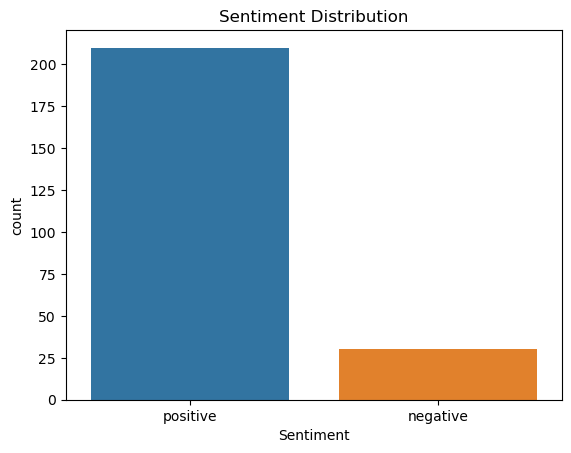

In [40]:
# Sentiment Distribution Plot
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

In [11]:
from bs4 import BeautifulSoup
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

nltk.download('stopwords') # Download the stop words corpus
stops = set(stopwords.words('english')) #english stopwords
stemmer = SnowballStemmer('english') #SnowballStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\param\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


This code snippet downloads the NLTK stopwords corpus for English and creates a set named `stops` containing common words like "is", "are", "the", etc., which are typically filtered out during text analysis to focus on meaningful content.

The line `temmer = SnowballStemmer('english')` initializes a Snowball stemming object named `temmer` for English. Stemming is the process of reducing words to their base or root form, which helps in normalizing variations of words. In this case, it allows for processing text data where words like "running", "ran", and "runner" are all reduced to "run", aiding in text analysis and natural language processing tasks.

The `review_to_words` function processes a raw text review to make it suitable for text analysis. It first removes HTML tags using BeautifulSoup and then keeps only alphabetic characters, converting them to lowercase and splitting them into individual words. It removes common stopwords and applies stemming to reduce words to their root forms, finally joining the processed words back into a single string.

In [12]:
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

In [13]:
stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [14]:
#apply review_to_words function on reviews
df['product_review'] = df['product_review'].apply(review_to_words)

In [15]:
#apply review_to_words function on reviews
df['product_detailed_review'] = df['product_detailed_review'].apply(review_to_words)

In [16]:
#prints the first three reviews from product_detailed_review
for review in df['product_detailed_review'][0:3]:
    print(review,'\n')

cooler great excel airflow price amaz love 

best budget cooler nice cool perform price 

qualiti good air power decent 



### Apply label encoding to the sentiment column
converting categorical `sentiment` labels ('Positive', 'Negative','Neutral'.) into numerical values using scikit-learn's LabelEncoder, storing the encoded values in a new column named `sentiment_encoded`. This transformation facilitates for sentiment analysis.

In [17]:
encoder = LabelEncoder()
df['sentiment_encoded'] = encoder.fit_transform(df['Sentiment'])

### Importing Required files For Sentiment analysis Classification 

In [18]:
from sklearn.model_selection import train_test_split #import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #import TfidfVectorizer 
from sklearn.metrics import confusion_matrix #import confusion_matrix
from sklearn.naive_bayes import MultinomialNB #import MultinomialNB
from sklearn.ensemble import RandomForestClassifier  #import RandomForestClassifier

### Creates TF-IDF vectorizer and transforms the corpus
This code initializes a TF-IDF vectorizer to convert text data from `df.product_detailed_review` into numerical TF-IDF representations. The resulting `reviews_corpus` variable holds a sparse matrix where rows represent reviews and columns represent unique words, weighted by their TF-IDF scores. The `.shape` attribute provides the dimensions of this matrix, indicating the number of reviews and unique words captured in the TF-IDF transformation.

In [19]:
vectorizer = TfidfVectorizer()
reviews_corpus = vectorizer.fit_transform(df.product_detailed_review)
reviews_corpus.shape

(240, 825)

In [20]:
sentiment = df['sentiment_encoded']
sentiment.shape

(240,)

### Split the data in train and test
train_test_split from scikit-learn to partition reviews_corpus and sentiment into training (X_train, Y_train) and testing (X_test, Y_test) sets, with 30% of the data reserved for testing and a fixed random seed (random_state=42) for reproducibility.

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(reviews_corpus,sentiment,test_size=0.3,random_state=42)

print('Train data shape ',X_train.shape,Y_train.shape)
print('Test data shape ',X_test.shape,Y_test.shape)

Train data shape  (168, 825) (168,)
Test data shape  (72, 825) (72,)


### Multinomial Naive Bayes classifier

In [22]:
clf_NB = MultinomialNB().fit(X_train, Y_train) #fit the training data

pred = clf_NB.predict(X_test) #predict the sentiment for test data

print("Accuracy: %.2f%%" %(clf_NB.score(X_test, Y_test)*100)) #check accuracy
print("Confusion Matrix") 
print(confusion_matrix(pred, Y_test)) #print confusion matrix

Accuracy: 87.50%
Confusion Matrix
[[ 0  0]
 [ 9 63]]


### Random Forest classifier

In [23]:
clf_RF = RandomForestClassifier().fit(X_train, Y_train)

pred = clf_RF.predict(X_test)

print("Accuracy: %.2f%%" % (clf_RF.score(X_test, Y_test) * 100))
print("Confusion Matrix")
print(confusion_matrix(pred, Y_test))

Accuracy: 87.50%
Confusion Matrix
[[ 0  0]
 [ 9 63]]
